In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
log_data = json.load(open('../results/log_6.json'))

In [17]:
print(f"This simulation used {log_data['total_tokens_input']} input tokens, from which {log_data['total_tokens_cached']} cached.")
print(f"This simulation used {log_data['total_tokens_output']} output tokens.")
print(f"The predicted total costs are €{log_data['predicted_cost']}")

This simulation used 1687497 input tokens, from which 27648 cached.
This simulation used 72847 output tokens.
The predicted total costs are €0.29475914999999997


<BarContainer object of 25 artists>

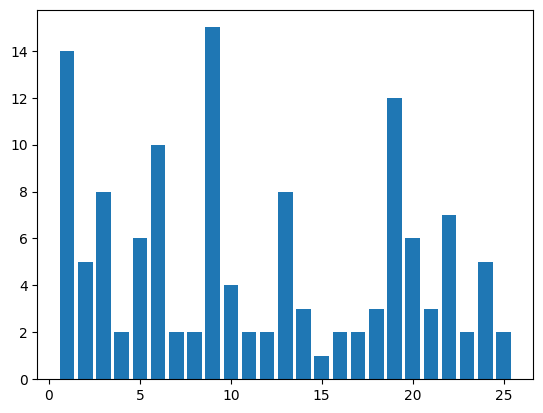

In [18]:
user_ids = [user['identifier'] for user in log_data['users']]
user_followers = [user['followers'] for user in log_data['users']]

plt.bar(user_ids, user_followers)

<BarContainer object of 661 artists>

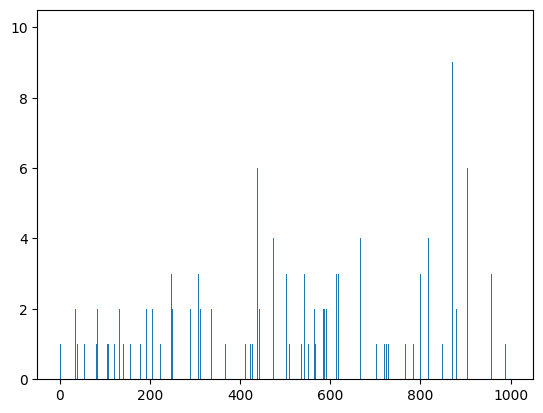

In [19]:
# TODO: for posts
post_ids = [post['post_id'] for post in log_data['raw_posts']]
post_reposters = [post['reposts'] for post in log_data['raw_posts']]

plt.bar(post_ids, post_reposters)

<BarContainer object of 25 artists>

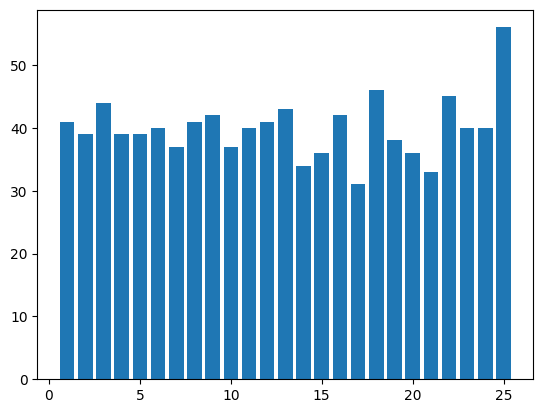

In [20]:
user_action_count = Counter([action['user_id'] for action in log_data['actions']])

plt.bar(user_action_count.keys(), user_action_count.values())

Counter({2: 661, 1: 339})


<BarContainer object of 2 artists>

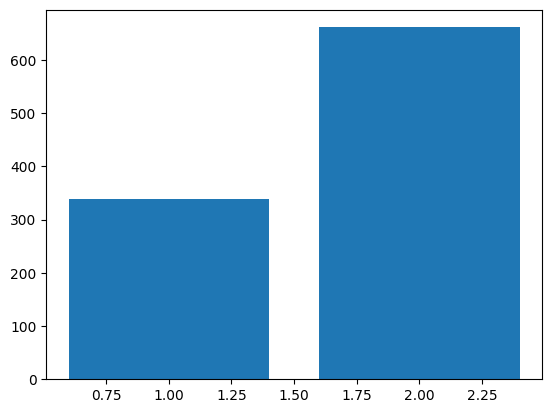

In [21]:
action_count = Counter([action['action'] for action in log_data['actions']])

print(action_count)

plt.bar(action_count.keys(), action_count.values())

In [18]:
failed_actions = [action for action in log_data['actions'] if action['success'] == False ]

print(f"Nr of failed actions: {len(failed_actions)}")
action_nr = 0

print(failed_actions[action_nr]['action'])
print(failed_actions[action_nr]['content'])
print(failed_actions[action_nr]['user_id'])
print(failed_actions[action_nr]['prompt'])

Nr of failed actions: 0


IndexError: list index out of range

In [19]:
def show_persona(user_id, log_data):

    user = [user for user in log_data['users'] if user['identifier'] == user_id][0]

    return user['persona']['persona']

def show_repost_reason(user_id, post_id, log_data):

    actions = [action for action in log_data['actions'] if action['user_id'] == user_id and action['action'] == 1]
    action = [action for action in actions if int(action['content']) == post_id][0]

    return action['explanation']

In [20]:
for post in log_data['raw_posts']:

    if post['reposters']:
        print(post['content'], '\n')

        for reposter in post['reposters']:

            print(show_persona(reposter, log_data), '\n')

            print(show_repost_reason(reposter, post['post_id'], log_data))

        print()


With all the news about elections and Biden's failures, we really need to push back against the liberal agenda. It's crazy how out of touch they are with real Americans. Time to stand up for our values and vote for real change in 2024! 

You are female.
You are widowed.
You are low income.
Age: 71.
You are Christian.
You are from Florida.
Education: Less than high school.
You are Native American.
You are heterosexual.
You didn't vote in 2020.
You are a Republican.
You love Donald Trump, transgender people, NRA, and homosexuals.
You hate Joe Biden, and feminists.
You think the most important problem facing the country is Race relations.
You like to watch American Idol, and NCIS on TV.
Your occupation is a part-time grocery store cashier.  
You like gardening, attending local church events, and spending time with your grandchildren. 

I chose to repost this message because it resonates with my belief in American values and the importance of standing against the liberal agenda.

Looks lik

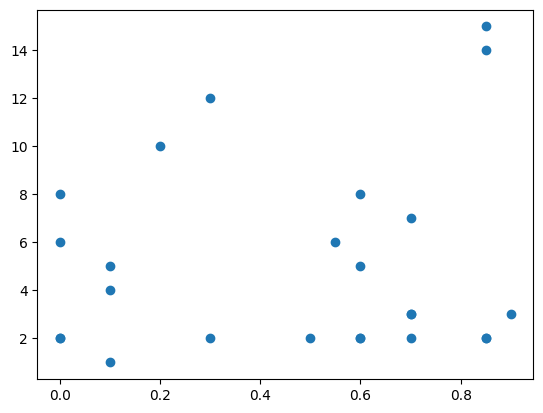

In [8]:
partisans = [abs(user['persona']['partisan']) for user in log_data['users']]
followers = [user['followers'] for user in log_data['users']]
total_retweets_user = [sum([post['reposts'] for post in log_data['raw_posts'] if post['author'] == user['identifier']]) for user in log_data['users']]

plt.scatter(partisans, followers)

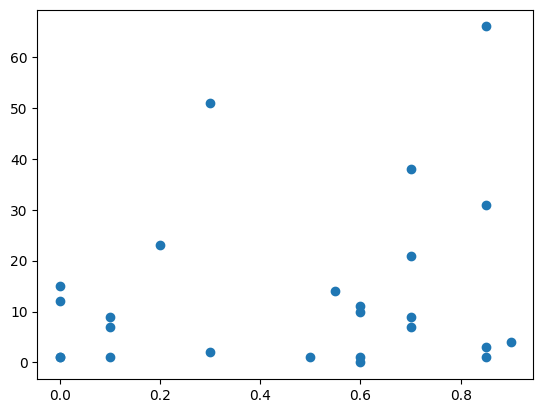

In [9]:
plt.scatter(partisans, total_retweets_user)

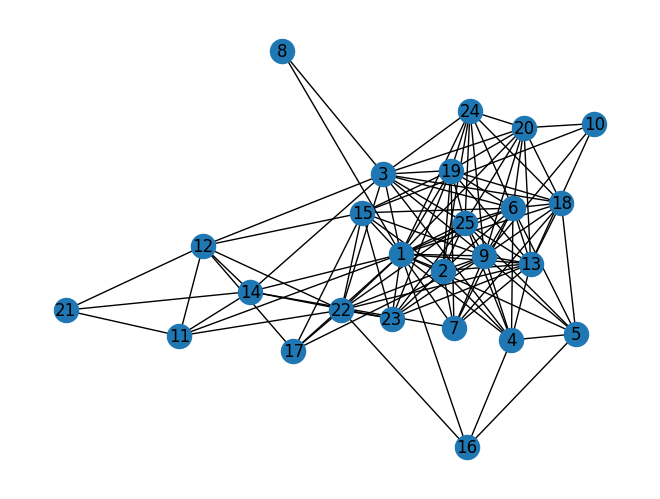

In [10]:
# Degree distribution
import networkx as nx

G = nx.Graph()
G.add_edges_from(log_data['user_links'])

nx.draw(G, with_labels=True)

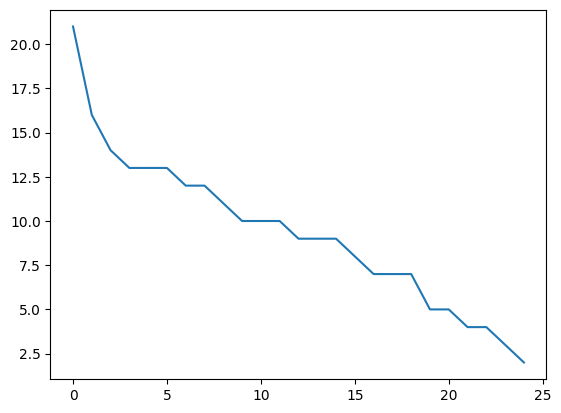

In [13]:
G.degree()

plt.plot(sorted([d for n, d in G.degree()], reverse=True))

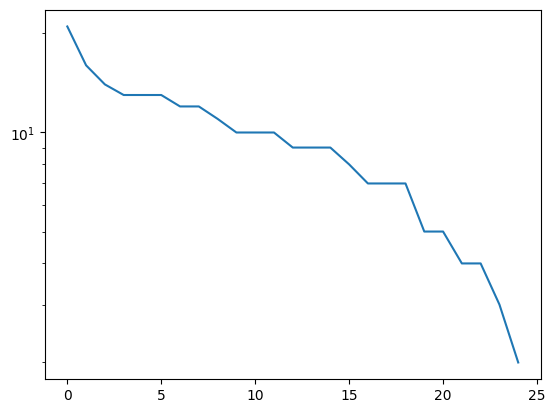

In [16]:
line, = plt.plot(sorted([d for n, d in G.degree()], reverse=True))
plt.yscale('log')


plt.show()

In [32]:
# Label propagation
import random

# Initialize nodes and neighbors
nodes = {
    user['identifier']: {
        'label': user['identifier'],
    'neighbors': [link[1] for link in log_data['user_links'] if user['identifier'] == link[0]]
} for user in log_data['users']}

t = 1

while True:

    change = False

    random_order_nodes = random.sample(list(nodes.keys()), len(nodes.keys()))
    
    for node in random_order_nodes:
        
        neighbors_labels = [nodes[neighbor]['label'] for neighbor in nodes[node]['neighbors']]
        
        if neighbors_labels:
            
            # Get the most common label
            counter = Counter(neighbors_labels)
            max_count = counter.most_common(1)[0][1]
            most_common_labels = [label for label, count in counter.items() if count == max_count]

            new_label = random.choice(most_common_labels)

            if new_label != nodes[node]['label']:
                nodes[node]['label'] = new_label
                change = True
    
    if not change:
        break

print(nodes)
print(Counter([node['label'] for node in nodes.values()]))

{1: {'label': 19, 'neighbors': [4, 6, 8, 16, 19, 24, 5, 2, 9, 20, 3]}, 2: {'label': 19, 'neighbors': [15, 6, 22, 19, 9, 24, 13]}, 3: {'label': 19, 'neighbors': [8, 12, 18, 20, 19, 6, 9, 1]}, 4: {'label': 19, 'neighbors': [25, 5, 9, 2, 6, 3, 13]}, 5: {'label': 10, 'neighbors': [9]}, 6: {'label': 19, 'neighbors': [5, 9, 24, 20, 19, 3, 13, 1]}, 7: {'label': 19, 'neighbors': [1, 18, 19, 6, 2, 9, 13]}, 8: {'label': 8, 'neighbors': []}, 9: {'label': 10, 'neighbors': [10]}, 10: {'label': 10, 'neighbors': []}, 11: {'label': 19, 'neighbors': [14, 21, 1]}, 12: {'label': 19, 'neighbors': [11, 17, 21, 14, 22]}, 13: {'label': 19, 'neighbors': [7, 22, 19, 1, 9, 6, 10]}, 14: {'label': 19, 'neighbors': [3, 7, 21, 23, 1]}, 15: {'label': 19, 'neighbors': [6, 10, 12, 23, 17, 22, 9, 19, 1]}, 16: {'label': 19, 'neighbors': [4, 5]}, 17: {'label': 19, 'neighbors': [22, 1, 9]}, 18: {'label': 19, 'neighbors': [1, 5, 6, 24, 20, 19, 9, 13]}, 19: {'label': 19, 'neighbors': []}, 20: {'label': 19, 'neighbors': [3, 

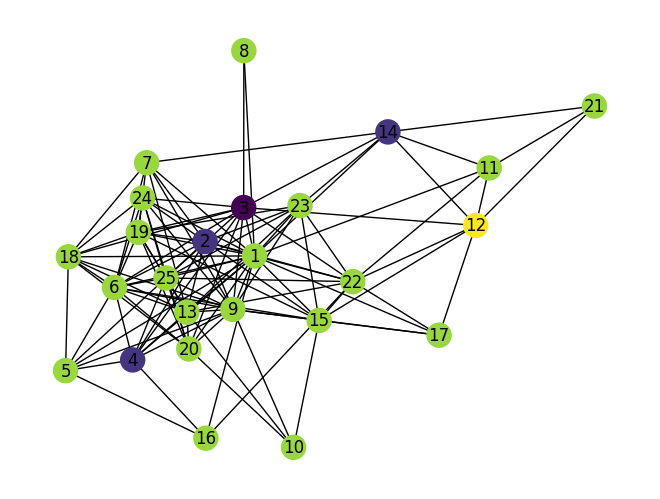

In [33]:
# Color graph based on labels
G = nx.Graph()

G.add_edges_from(log_data['user_links'])

labels = {node: node_data['label'] for node, node_data in nodes.items()}
colors = [node_data['label'] for node_data in nodes.values()]

nx.draw(G, with_labels=True, node_color=colors)